In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import preprocessing
import seaborn as sns

from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

In [2]:
books_data = preprocessing.load_books_rating_data(20000)
books_data

,score,text
0,4.0,This is only for Julie Strain fans. It's a col...
1,5.0,I don't care much for Dr. Seuss but after read...
2,5.0,"If people become the books they read and if ""t..."
3,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...
19995,5.0,I truly cannot remember the last time I have r...
19996,5.0,I am only sixteen years old and i just finishe...
19997,5.0,I already wrote a review for this book; howeve...
19998,5.0,I don't know what an average reader like me ca...


<AxesSubplot: xlabel='score', ylabel='count'>

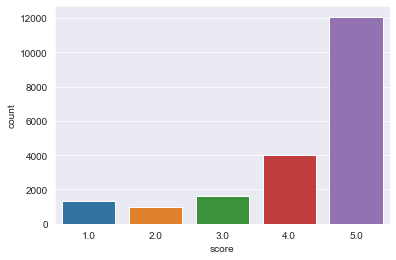

In [3]:
sns.countplot(x="score", data=books_data)

In [9]:
X_tokenized, tokenizer = preprocessing.nn_tokenize(books_data)
X_padded = preprocessing.nn_pad(X_tokenized, None)

<AxesSubplot: xlabel='score', ylabel='count'>

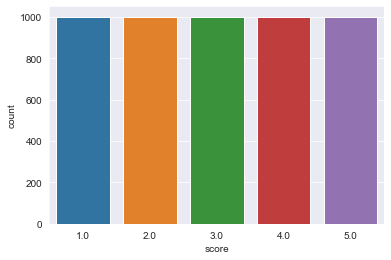

In [10]:
X_balanced, y_balanced = preprocessing.under_sample(X_padded, books_data.score)
sns.countplot(x="score", data=pd.DataFrame(y_balanced))

In [12]:
y_one_hot = preprocessing.one_hot_encode(y_balanced)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_one_hot, test_size=0.20, random_state=42)

In [14]:
embeddings_matrix = preprocessing.create_embeddings_matrix(tokenizer.word_index)

In [16]:
model = Sequential()

embedding_layer = Embedding(
    len(tokenizer.word_index) + 1,
    300,
    weights=[embeddings_matrix],
    input_length=max([len(sent) for sent in X_balanced]),
    trainable=False
)
model.add(embedding_layer)

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2425, 300)         19228500  
                                                                 
 flatten (Flatten)           (None, 727500)            0         
                                                                 
 dense (Dense)               (None, 32)                23280032  
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 42,509,753
Trainable params: 23,281,253
Non-trainable params: 19,228,500
_________________________________________________________________
None


In [17]:
BATCH_SIZE = 1024
EPOCHS = 8

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/8
8/8 [==============================] - 159s 18s/step - loss: 1.6841 - accuracy: 0.2119 - val_loss: 1.6274 - val_accuracy: 0.2490
Epoch 2/8
8/8 [==============================] - 149s 19s/step - loss: 1.4873 - accuracy: 0.3580 - val_loss: 1.5908 - val_accuracy: 0.2928
Epoch 3/8
8/8 [==============================] - 143s 18s/step - loss: 1.2344 - accuracy: 0.5252 - val_loss: 1.5206 - val_accuracy: 0.3436
Epoch 4/8
8/8 [==============================] - 159s 21s/step - loss: 0.9716 - accuracy: 0.6998 - val_loss: 1.5416 - val_accuracy: 0.3436
Epoch 5/8
8/8 [==============================] - 177s 22s/step - loss: 0.7258 - accuracy: 0.8291 - val_loss: 1.5474 - val_accuracy: 0.3451
Epoch 6/8
8/8 [==============================] - 133s 17s/step - loss: 0.5228 - accuracy: 0.8995 - val_loss: 1.5945 - val_accuracy: 0.3466
Epoch 7/8
8/8 [==============================] - 169s 21s/step - loss: 0.3669 - accuracy: 0.9464 - val_loss: 1.6720 - val_accuracy: 0.3405
Epoch 8/8
8/8 [============

In [18]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

78/78 [==============================] - 9s 108ms/step - loss: 1.7482 - accuracy: 0.3433
Test Score: 1.748180627822876
Test Accuracy: 0.3432595431804657


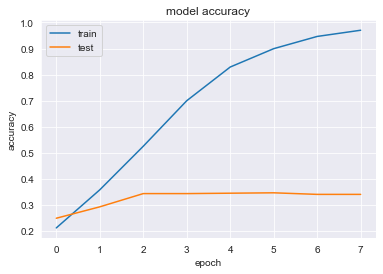

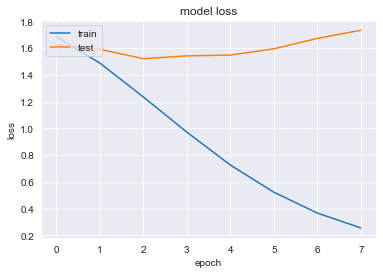

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

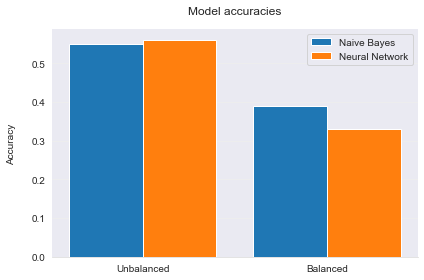

In [20]:
# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots()

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
xs = np.arange(2)

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(xs, [0.55, 0.39], width=bar_width, label='Naive Bayes')
# Same thing, but offset the x.
b2 = ax.bar(xs + bar_width, [0.56, 0.33], width=bar_width, label='Neural Network')

# Fix the x-axes.
ax.set_xticks(xs + bar_width / 2)
ax.set_xticklabels(["Unbalanced", "Balanced"])

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_ylabel('Accuracy', labelpad=15)
ax.set_title('Model accuracies', pad=15)

fig.tight_layout()